<a href="https://colab.research.google.com/github/tumuluripradeep/CAP_M20_1_InitialReport_EDA/blob/main/Capstone_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Sales Forecast


**Problem:**

There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

**Aim:**

My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

**Solution:**

With the accurate prediction company can;

Determine seasonal demands and take action for this
Protect from money loss because achieving sales targets can have a positive effect on stock prices and investors' perceptions
Forecast revenue easily and accurately
Manage inventories
Do more effective campaigns

**Plan:**

Understanding, Cleaning and Exploring Data

Preparing Data to Modeling

Random Forest Regressor

ARIMA/ExponentialSmooting/ARCH Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import holidays
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/data/train.csv')
test = pd.read_csv('/content/data/test.csv')
stores = pd.read_csv('/content/data/stores.csv')
features = pd.read_csv('/content/data/features.csv')

**DATA PREPROCESSING**

In [ ]:
display("--------------Train SAMPLE---------------------")
display(train.sample(10))

display("--------------Test SAMPLE---------------------")
display(test.sample(10))

display("--------------Stores SAMPLE---------------------")
display(stores.sample(10))

display("--------------Features SAMPLE---------------------")
display(features.sample(10))

'--------------Train SAMPLE---------------------'

,Store,Dept,Date,Weekly_Sales,IsHoliday
288759,30,17,2011-09-09,323.52,True
132400,14,32,2011-01-28,7463.06,False
146019,15,80,2011-09-09,7.00,True
408805,44,52,2012-06-29,1.47,False
360821,38,97,2010-09-10,10274.03,True
196546,20,91,2011-03-18,82367.08,False
131116,14,23,2011-02-18,30797.67,False
14081,2,29,2010-03-19,6771.70,False
112081,12,31,2011-04-15,2836.36,False
243659,25,55,2011-12-09,17585.58,False


'--------------Test SAMPLE---------------------'

,Store,Dept,Date,IsHoliday
27180,11,13,2013-07-12,False
106134,41,87,2013-01-18,False
61343,23,82,2013-05-24,False
45890,18,8,2013-05-03,False
100387,39,74,2013-07-05,False
103562,40,93,2013-07-05,False
858,1,24,2012-12-21,False
70202,27,6,2013-05-31,False
3292,2,14,2012-11-16,False
31820,12,91,2013-06-07,False


'--------------Stores SAMPLE---------------------'

,Store,Type,Size
37,38,C,39690
16,17,B,93188
18,19,A,203819
17,18,B,120653
33,34,A,158114
35,36,A,39910
3,4,A,205863
21,22,B,119557
43,44,C,39910
27,28,A,206302


'--------------Features SAMPLE---------------------'

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
7826,44,2010-02-05,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
3890,22,2011-05-27,62.59,4.034,NaN,NaN,NaN,NaN,NaN,138.678283,8.252,False
5242,29,2012-11-23,41.34,3.727,257.29,NaN,56888.86,46.80,327.65,138.424667,9.151,True
2623,15,2011-07-15,73.34,3.915,NaN,NaN,NaN,NaN,NaN,135.783742,7.806,False
5931,33,2012-02-24,59.41,3.950,577.17,268.61,NaN,2.61,1653.57,130.550207,7.603,False
5470,31,2010-04-16,67.87,2.808,NaN,NaN,NaN,NaN,NaN,210.149546,8.200,False
3780,21,2012-10-12,61.53,3.601,4007.81,NaN,15.79,610.52,3714.75,223.015426,6.170,False
3906,22,2011-09-16,68.08,3.809,NaN,NaN,NaN,NaN,NaN,140.273500,8.023,False
1082,6,2013-05-24,78.46,3.494,5842.49,194.86,368.14,1000.80,7037.72,NaN,NaN,False
1268,7,2013-06-21,52.16,3.736,1434.01,116.52,92.13,471.28,2812.28,NaN,NaN,False


In [ ]:
display("--------------Train INFO---------------------")
display(train.info())
display("--------------Test INFO---------------------")
display(test.info())
display("--------------Stores INFO---------------------")
display(stores.info())
display("--------------Features INFO---------------------")
display(features.info())

'--------------Train INFO---------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


None

'--------------Test INFO---------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


None

'--------------Stores INFO---------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


None

'--------------Features INFO---------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


None

In [ ]:
display("--------------Train Desc---------------------")
display(train.describe())
display("--------------Test Desc---------------------")
display(test.describe())
display("--------------Stores Desc---------------------")
display(stores.describe())
display("--------------Features Desc---------------------")
display(features.describe())

'--------------Train Desc---------------------'

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


'--------------Test Desc---------------------'

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


'--------------Stores Desc---------------------'

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


'--------------Features Desc---------------------'

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
display("--------------Train Isnull---------------------")
display(train.isnull().sum())
display("--------------Test Isnull---------------------")
display(test.isnull().sum())
display("--------------Stores Isnull---------------------")
display(stores.isnull().sum())
display("--------------Features Isnull---------------------")
display(features.isnull().sum())

'--------------Train Isnull---------------------'

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


'--------------Test Isnull---------------------'

,0
Store,0
Dept,0
Date,0
IsHoliday,0


'--------------Stores Isnull---------------------'

,0
Store,0
Type,0
Size,0


'--------------Features Isnull---------------------'

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


Unique Store Types :

In [ ]:
display(stores['Type'].unique())

array(['A', 'B', 'C'], dtype=object)

Unique Departments:

In [ ]:
display(train['Dept'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

**FEATURE ENGINEERING**

Combining Store and Department infos

In [ ]:
train['Store_Dept'] = train['Store'].astype(str) + '_' + train['Dept'].astype(str)
test['Store_Dept'] = test['Store'].astype(str) + '_' + test['Dept'].astype(str)

Extracting month and year from 'Date' column:

In [ ]:
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Year'] = pd.to_datetime(train['Date']).dt.year

test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Year'] = pd.to_datetime(test['Date']).dt.year

features['Month'] = pd.to_datetime(features['Date']).dt.month
features['Year'] = pd.to_datetime(features['Date']).dt.year

Calculating the total amount of markdowns

In [ ]:
features['Total_MarkDown'] = features['MarkDown1'] + features['MarkDown2']+ features['MarkDown3'] + features['MarkDown4'] + features['MarkDown5']

Encoding categorical variables

In [ ]:
store_type_dummies = pd.get_dummies(stores['Type'], prefix = 'Store_Type', drop_first=True)
stores= pd.concat([stores, store_type_dummies], axis = 1)

Mergeing add. features to datasets

In [ ]:
train = train.merge(stores, on='Store', how = 'left')
train = train.merge(features, on= ['Store', 'Date'], how='left')
test = test.merge(stores, on='Store',how = 'left')
test= test.merge(features,on =['Store','Date'], how ='left')

In [ ]:
display(train.sample(10))
display(test.sample(10))
display(stores.sample(10))
display(features.sample(10))

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Store_Dept,Month_x,Year_x,Type,Size,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month_y,Year_y,Total_MarkDown
247481,26,5,2010-04-02,27320.44,False,26_5,4,2010,A,152513,...,NaN,NaN,NaN,NaN,131.901968,8.512,False,4,2010,NaN
157567,17,1,2012-01-27,18901.40,False,17_1,1,2012,B,93188,...,684.22,NaN,118.00,1109.10,130.314452,6.403,False,1,2012,NaN
106425,11,87,2010-02-19,12496.75,False,11_87,2,2010,A,207499,...,NaN,NaN,NaN,NaN,214.619887,7.368,False,2,2010,NaN
153704,16,45,2010-06-04,5.77,False,16_45,6,2010,B,57197,...,NaN,NaN,NaN,NaN,189.422658,6.842,False,6,2010,NaN
171675,18,32,2011-07-08,11477.65,False,18_32,7,2011,B,120653,...,NaN,NaN,NaN,NaN,135.628333,8.890,False,7,2011,NaN
260615,27,29,2010-03-12,6959.04,False,27_29,3,2010,A,204184,...,NaN,NaN,NaN,NaN,135.627001,8.237,False,3,2010,NaN
388210,41,67,2011-04-22,10950.50,False,41_67,4,2011,A,196321,...,NaN,NaN,NaN,NaN,192.523464,6.934,False,4,2011,NaN
14832,2,34,2010-11-26,24333.06,True,2_34,11,2010,A,202307,...,NaN,NaN,NaN,NaN,211.406287,8.163,True,11,2010,NaN
77163,8,83,2012-05-04,2678.10,False,8_83,5,2012,A,155078,...,NaN,260.55,3338.11,2197.51,225.228831,5.679,False,5,2012,NaN
412411,45,4,2011-01-14,23418.40,False,45_4,1,2011,B,118221,...,NaN,NaN,NaN,NaN,182.658578,8.549,False,1,2011,NaN


,Store,Dept,Date,IsHoliday_x,Store_Dept,Month_x,Year_x,Type,Size,Store_Type_B,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month_y,Year_y,Total_MarkDown
31206,12,58,2012-11-16,False,12_58,11,2012,B,112238,True,...,237.82,51.29,6519.99,5196.47,131.325800,10.199,False,11,2012,25840.73
3753,2,26,2013-07-26,False,2_26,7,2013,A,202307,False,...,609.55,91.00,493.60,2416.20,NaN,NaN,False,7,2013,5576.81
48669,19,10,2013-05-24,False,19_10,5,2013,A,203819,False,...,595.88,1042.67,2355.77,3727.00,NaN,NaN,False,5,2013,13611.25
43365,17,12,2013-05-10,False,17_12,5,2013,B,93188,True,...,82.96,32.21,438.28,5389.83,NaN,NaN,False,5,2013,8871.63
69476,26,82,2013-06-21,False,26_82,6,2013,A,152513,False,...,406.72,126.40,1265.84,4277.88,NaN,NaN,False,6,2013,10956.68
23070,9,48,2012-12-21,False,9_48,12,2012,B,125833,True,...,107.88,205.02,NaN,421.38,227.639444,4.954,False,12,2012,NaN
94452,37,3,2013-05-24,False,37_3,5,2013,C,39910,False,...,NaN,52.21,NaN,1090.65,NaN,NaN,False,5,2013,NaN
13801,6,13,2013-05-31,False,6_13,5,2013,A,202505,False,...,251.75,413.12,1.92,3945.71,NaN,NaN,False,5,2013,10462.08
72478,27,92,2013-01-18,False,27_92,1,2013,A,204184,False,...,7946.12,8.60,4105.50,2873.45,142.732017,7.945,False,1,2013,23105.67
88254,34,27,2013-01-25,False,34_27,1,2013,A,158114,False,...,3204.02,NaN,3065.59,1936.25,132.092290,8.934,False,1,2013,NaN


,Store,Type,Size,Store_Type_B,Store_Type_C
15,16,B,57197,True,False
12,13,A,219622,False,False
34,35,B,103681,True,False
7,8,A,155078,False,False
29,30,C,42988,False,True
35,36,A,39910,False,False
3,4,A,205863,False,False
23,24,A,203819,False,False
11,12,B,112238,True,False
22,23,B,114533,True,False


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Year,Total_MarkDown
7567,42,2012-02-10,55.73,3.722,992.73,13.93,25.70,NaN,1700.95,130.384903,7.545,True,2,2012,NaN
6514,36,2012-11-09,68.58,3.313,-16.93,850.05,NaN,NaN,733.24,222.150626,6.228,False,11,2012,NaN
693,4,2012-11-30,50.91,3.240,4642.37,NaN,5146.88,243.50,9819.68,131.427533,3.879,False,11,2012,NaN
7528,42,2011-05-13,74.04,4.202,NaN,NaN,NaN,NaN,NaN,129.089000,8.494,False,5,2011,NaN
6471,36,2012-01-13,56.28,3.254,15.85,1402.86,7.04,NaN,858.31,218.582339,7.244,False,1,2012,NaN
5838,33,2010-05-14,76.80,3.145,NaN,NaN,NaN,NaN,NaN,126.208548,9.849,False,5,2010,NaN
1583,9,2012-07-13,82.39,3.256,3031.81,NaN,2.02,47.76,4554.39,225.677146,5.277,False,7,2012,NaN
2735,16,2010-03-12,28.64,2.684,NaN,NaN,NaN,NaN,NaN,189.737208,7.039,False,3,2010,NaN
5568,31,2012-03-02,59.30,3.630,21236.34,1039.56,26.38,11668.85,7948.31,220.486689,7.057,False,3,2012,41919.44
7113,40,2010-05-21,56.75,2.961,NaN,NaN,NaN,NaN,NaN,132.223032,5.435,False,5,2010,NaN


Creating lag features to capture the trend and seasonality in the data

In [ ]:
train['Weekly_Sales_Lag1'] = train['Weekly_Sales'].shift(1)
train['Weekly_Sales_Lag2'] = train['Weekly_Sales'].shift(2)

Rolling mean & Rolling std dev

In [ ]:
train['Rolling_Mean'] = train['Weekly_Sales'].rolling(window=4).mean()
train['Rolling_Std'] = train['Weekly_Sales'].rolling(window=4).std()

Creating Seasonal Features

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])

train['Month']  = train['Date'].dt.month
train['Quarter']  = train['Date'].dt.quarter
train['WeekOfYear']  = train['Date'].dt.isocalendar().week


display(train.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Store_Dept,Month_x,Year_x,Type,Size,...,Month_y,Year_y,Total_MarkDown,Weekly_Sales_Lag1,Weekly_Sales_Lag2,Rolling_Mean,Rolling_Std,Month,Quarter,WeekOfYear
0,1,1,2010-02-05,24924.50,False,1_1,2,2010,A,151315,...,2,2010,NaN,NaN,NaN,NaN,NaN,2,1,5
1,1,1,2010-02-12,46039.49,True,1_1,2,2010,A,151315,...,2,2010,NaN,24924.50,NaN,NaN,NaN,2,1,6
2,1,1,2010-02-19,41595.55,False,1_1,2,2010,A,151315,...,2,2010,NaN,46039.49,24924.50,NaN,NaN,2,1,7
3,1,1,2010-02-26,19403.54,False,1_1,2,2010,A,151315,...,2,2010,NaN,41595.55,46039.49,32990.77,12832.106391,2,1,8
4,1,1,2010-03-05,21827.90,False,1_1,3,2010,A,151315,...,3,2010,NaN,19403.54,41595.55,32216.62,13554.047185,3,1,9


**DATA TRANSFORMATION**

Converting the 'Date' column to datetime format

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

Sorting dataset by 'Date'

In [ ]:
train = train.sort_values('Date')
test = test.sort_values('Date')
features = features.sort_values('Date')

In [ ]:
#setting 'Date' as the index

train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)
features.set_index('Date', inplace=True)

#Filling missing values
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)
features.fillna(0, inplace=True)

#Reseting index
train.reset_index(inplace=True)
test.reset_index(inplace=True)
features.reset_index(inplace=True)

In [ ]:
display(features.head())

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Year,Total_MarkDown
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,0.0
1,2010-02-05,16,19.79,2.580,0.0,0.0,0.0,0.0,0.0,189.381697,7.039,False,2,2010,0.0
2,2010-02-05,31,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2,2010,0.0
3,2010-02-05,21,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2,2010,0.0
4,2010-02-05,26,9.55,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,8.488,False,2,2010,0.0


**Exploratory Data Analysis (EDA)**

In [ ]:
print("stores.csv columns:")
display(stores.columns)
print("\n\ntrain.csv_columns:")
display(train.columns)
print("\n\nfeatures.csv_columns")
display(features.columns)

stores.csv columns:


Index(['Store', 'Type', 'Size', 'Store_Type_B', 'Store_Type_C'], dtype='object')



train.csv_columns:


Index(['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Store_Dept',
       'Month_x', 'Year_x', 'Type', 'Size', 'Store_Type_B', 'Store_Type_C',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y',
       'Month_y', 'Year_y', 'Total_MarkDown', 'Weekly_Sales_Lag1',
       'Weekly_Sales_Lag2', 'Rolling_Mean', 'Rolling_Std', 'Month', 'Quarter',
       'WeekOfYear'],
      dtype='object')



features.csv_columns


Index(['Date', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Month', 'Year', 'Total_MarkDown'],
      dtype='object')

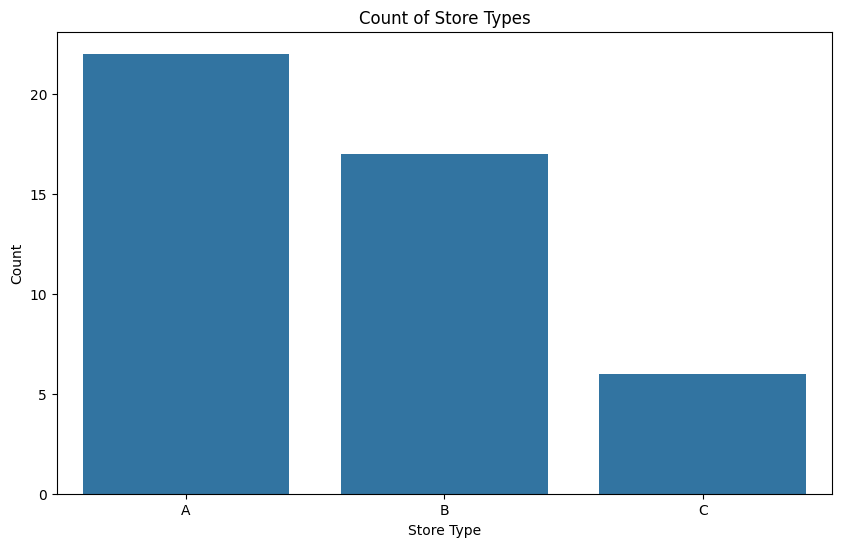

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=stores, x='Type')
plt.title('Count of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

Distribution of store sizes

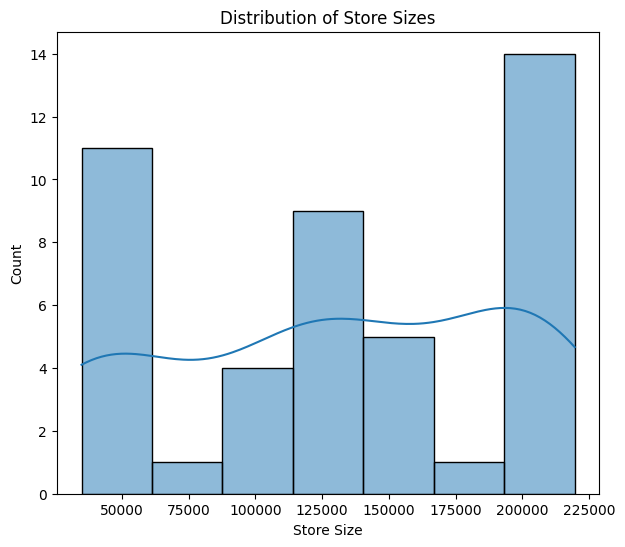

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=stores, x='Size', kde=True)
plt.title('Distribution of Store Sizes')
plt.xlabel('Store Size')
plt.ylabel('Count')
plt.show()

Distribution of Weekly Sales

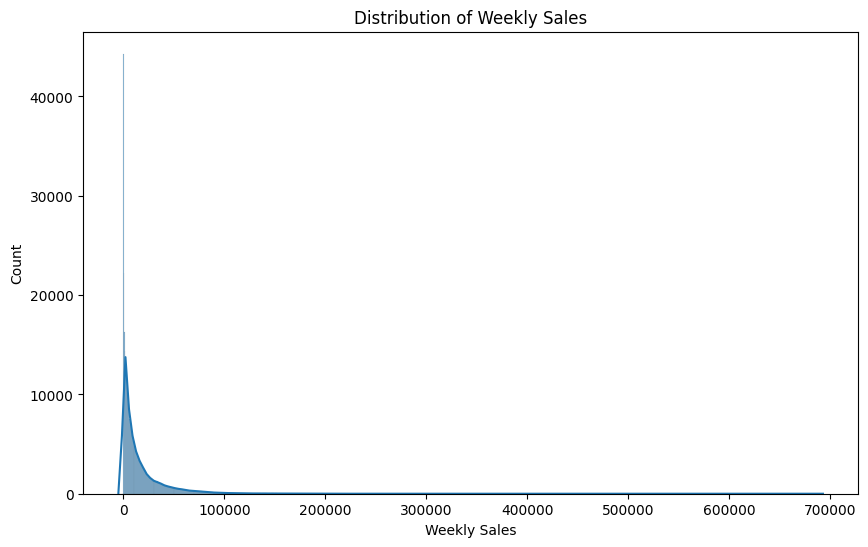

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=train, x= 'Weekly_Sales', kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')
plt.show()

Weekly Sales vs Store

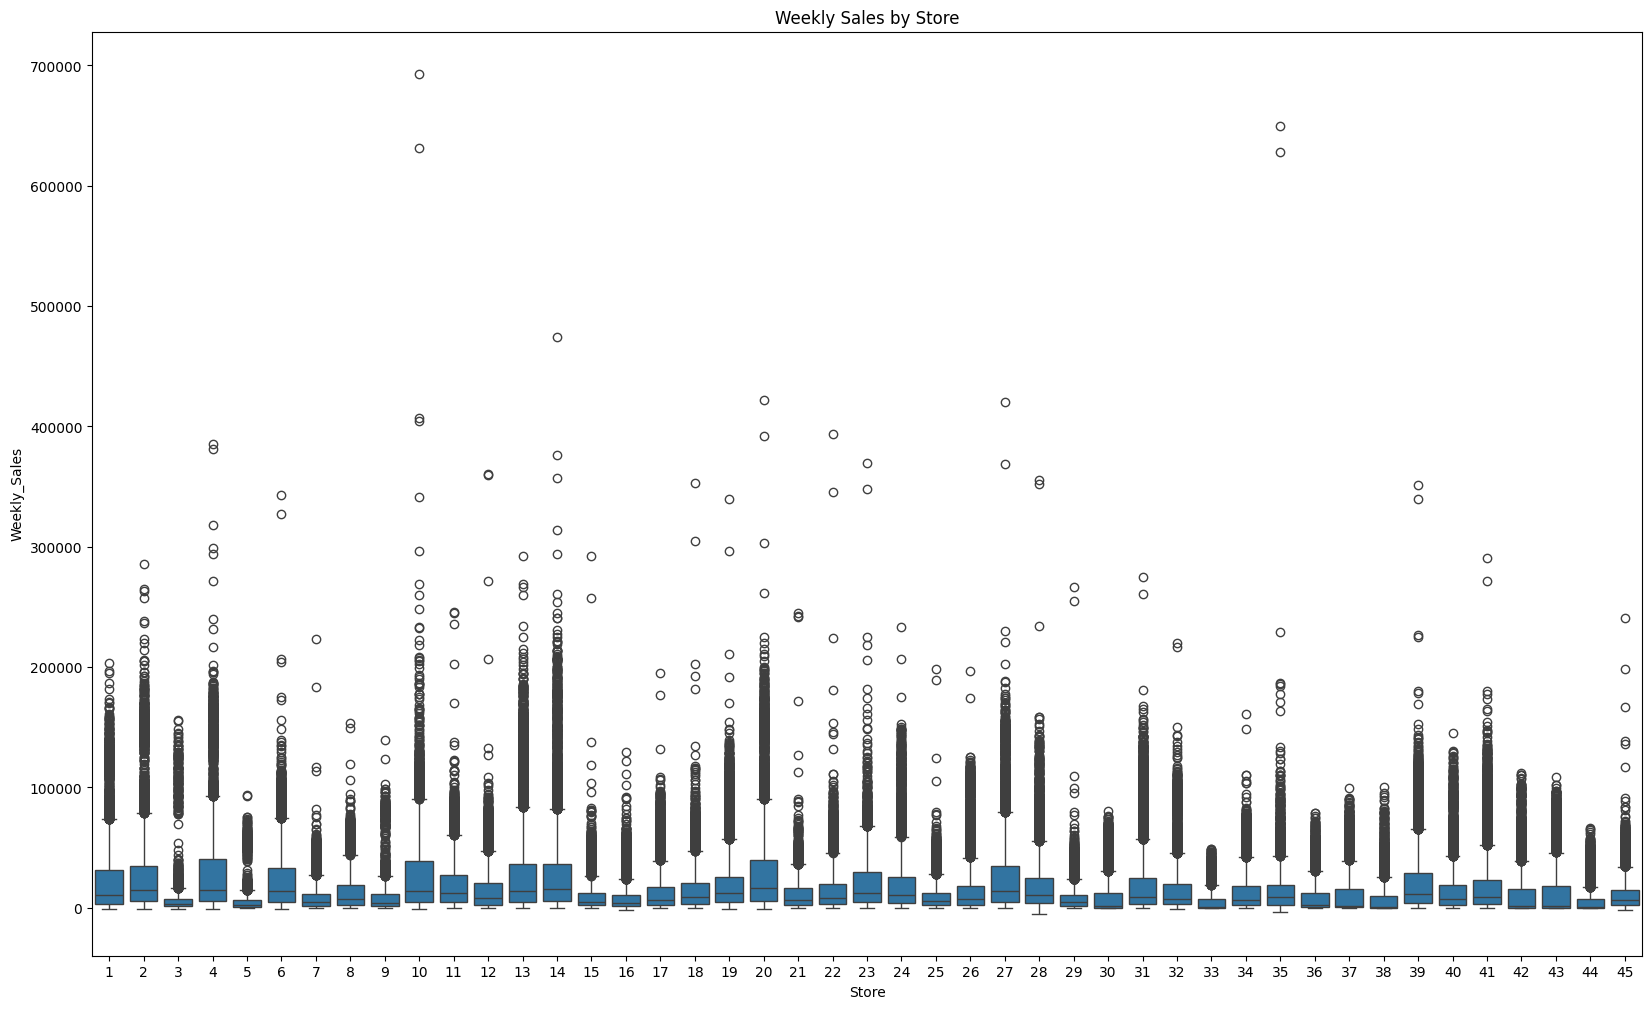

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data=train, x='Store', y= 'Weekly_Sales')
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

Weekly sales vs department

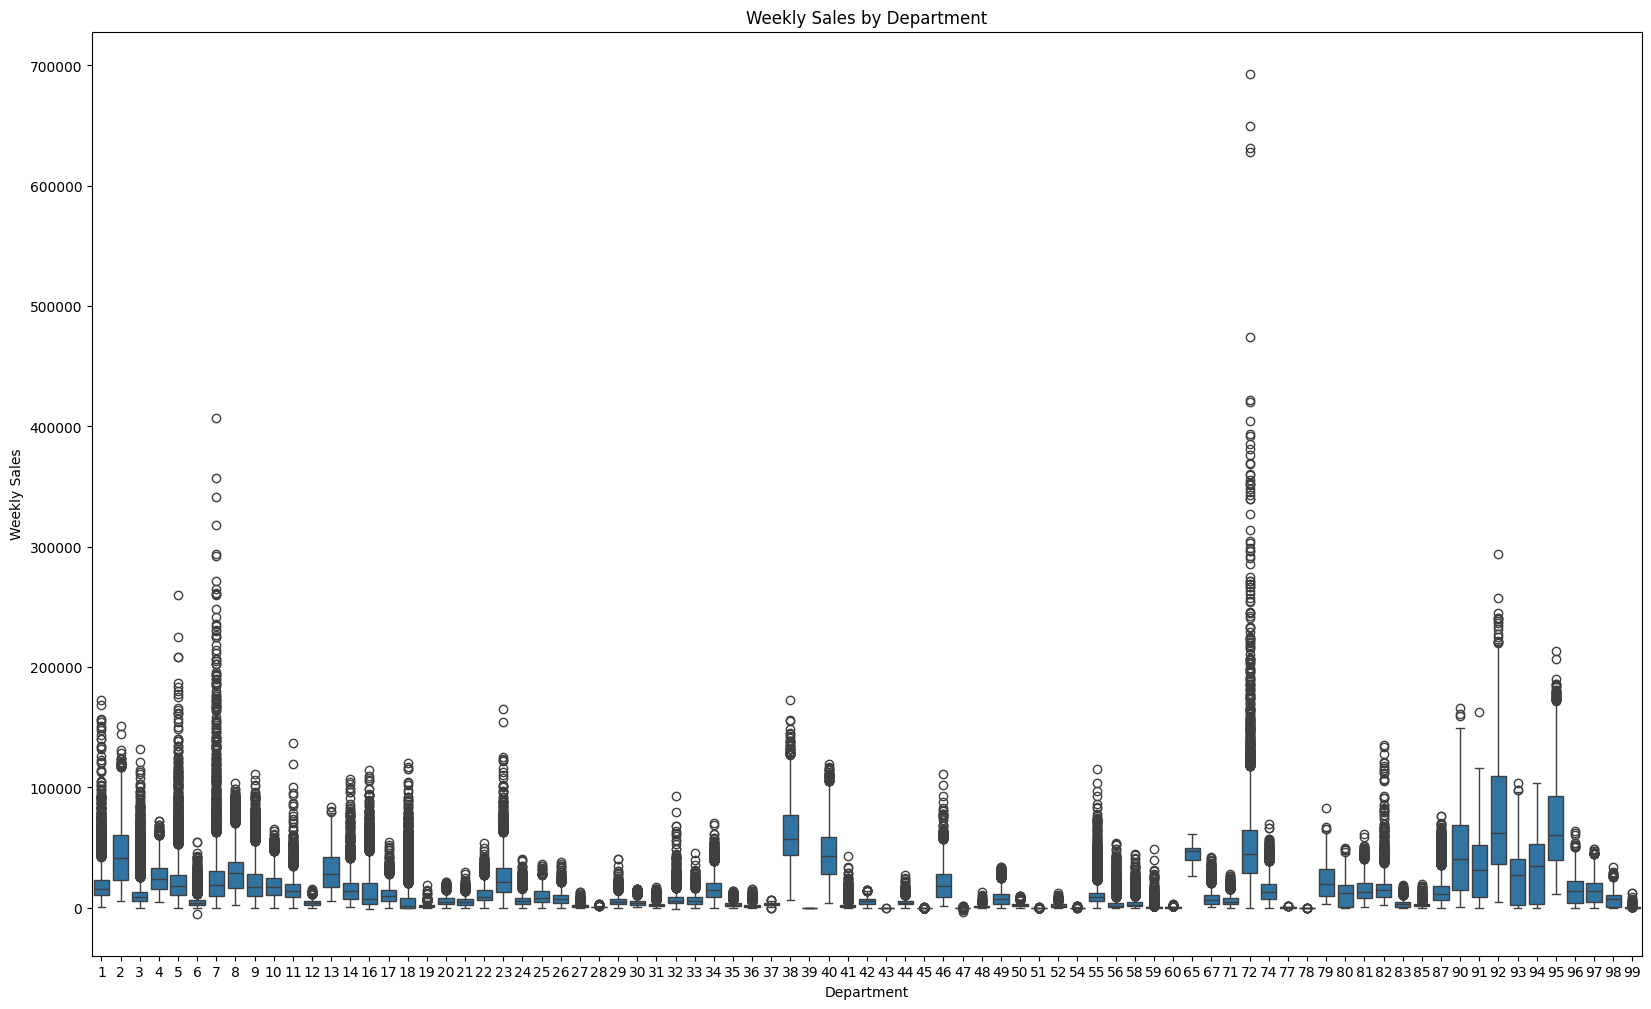

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data = train, x='Dept', y='Weekly_Sales')
plt.title('Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

Weekly Sales vs Over Time

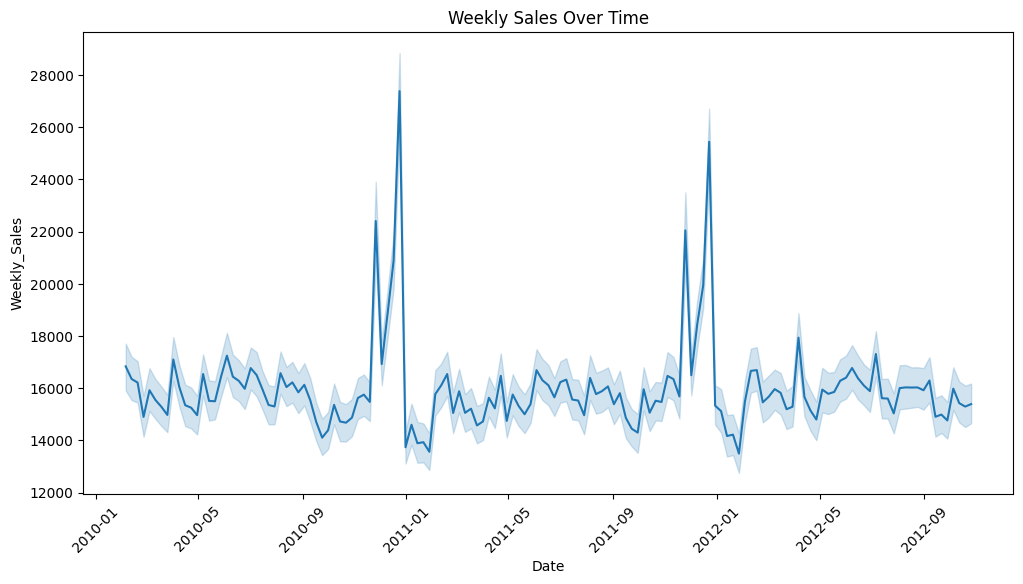

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data = train, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.xticks(rotation=45)
plt.show()

Weekly Sales vs Temperature

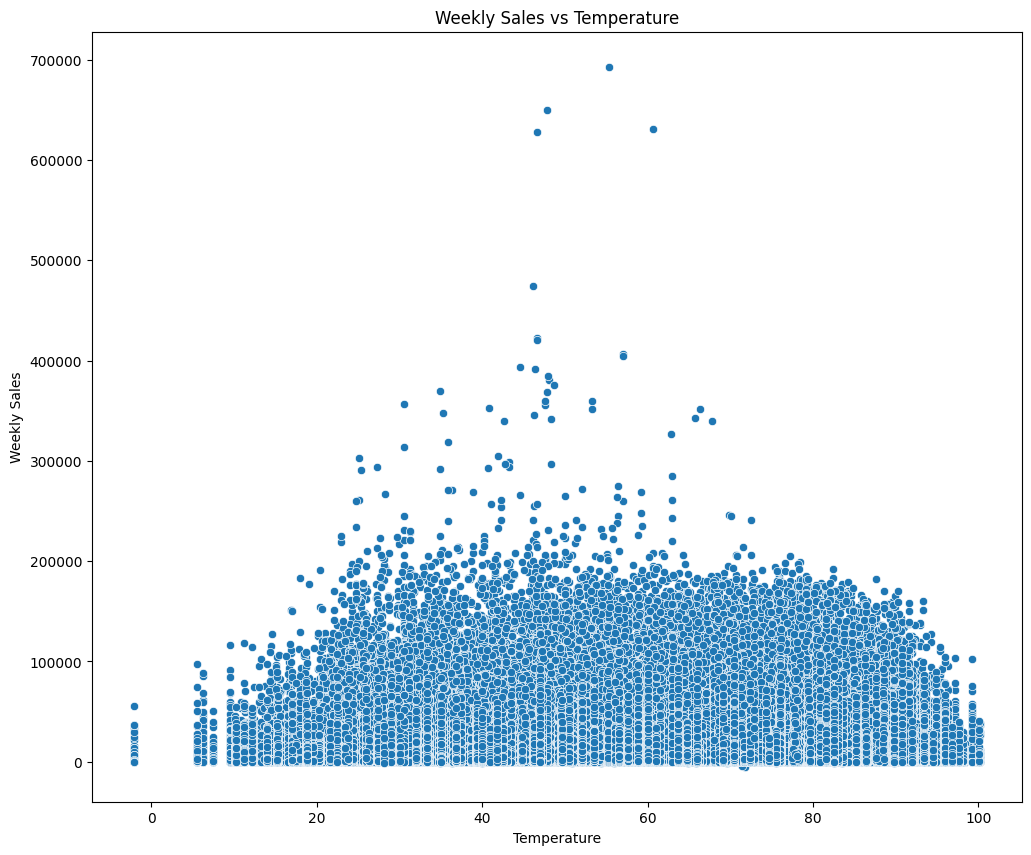

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=train, x='Temperature', y='Weekly_Sales')
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

Numerical Columns

In [ ]:
num_cols =  ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

Relationships between features

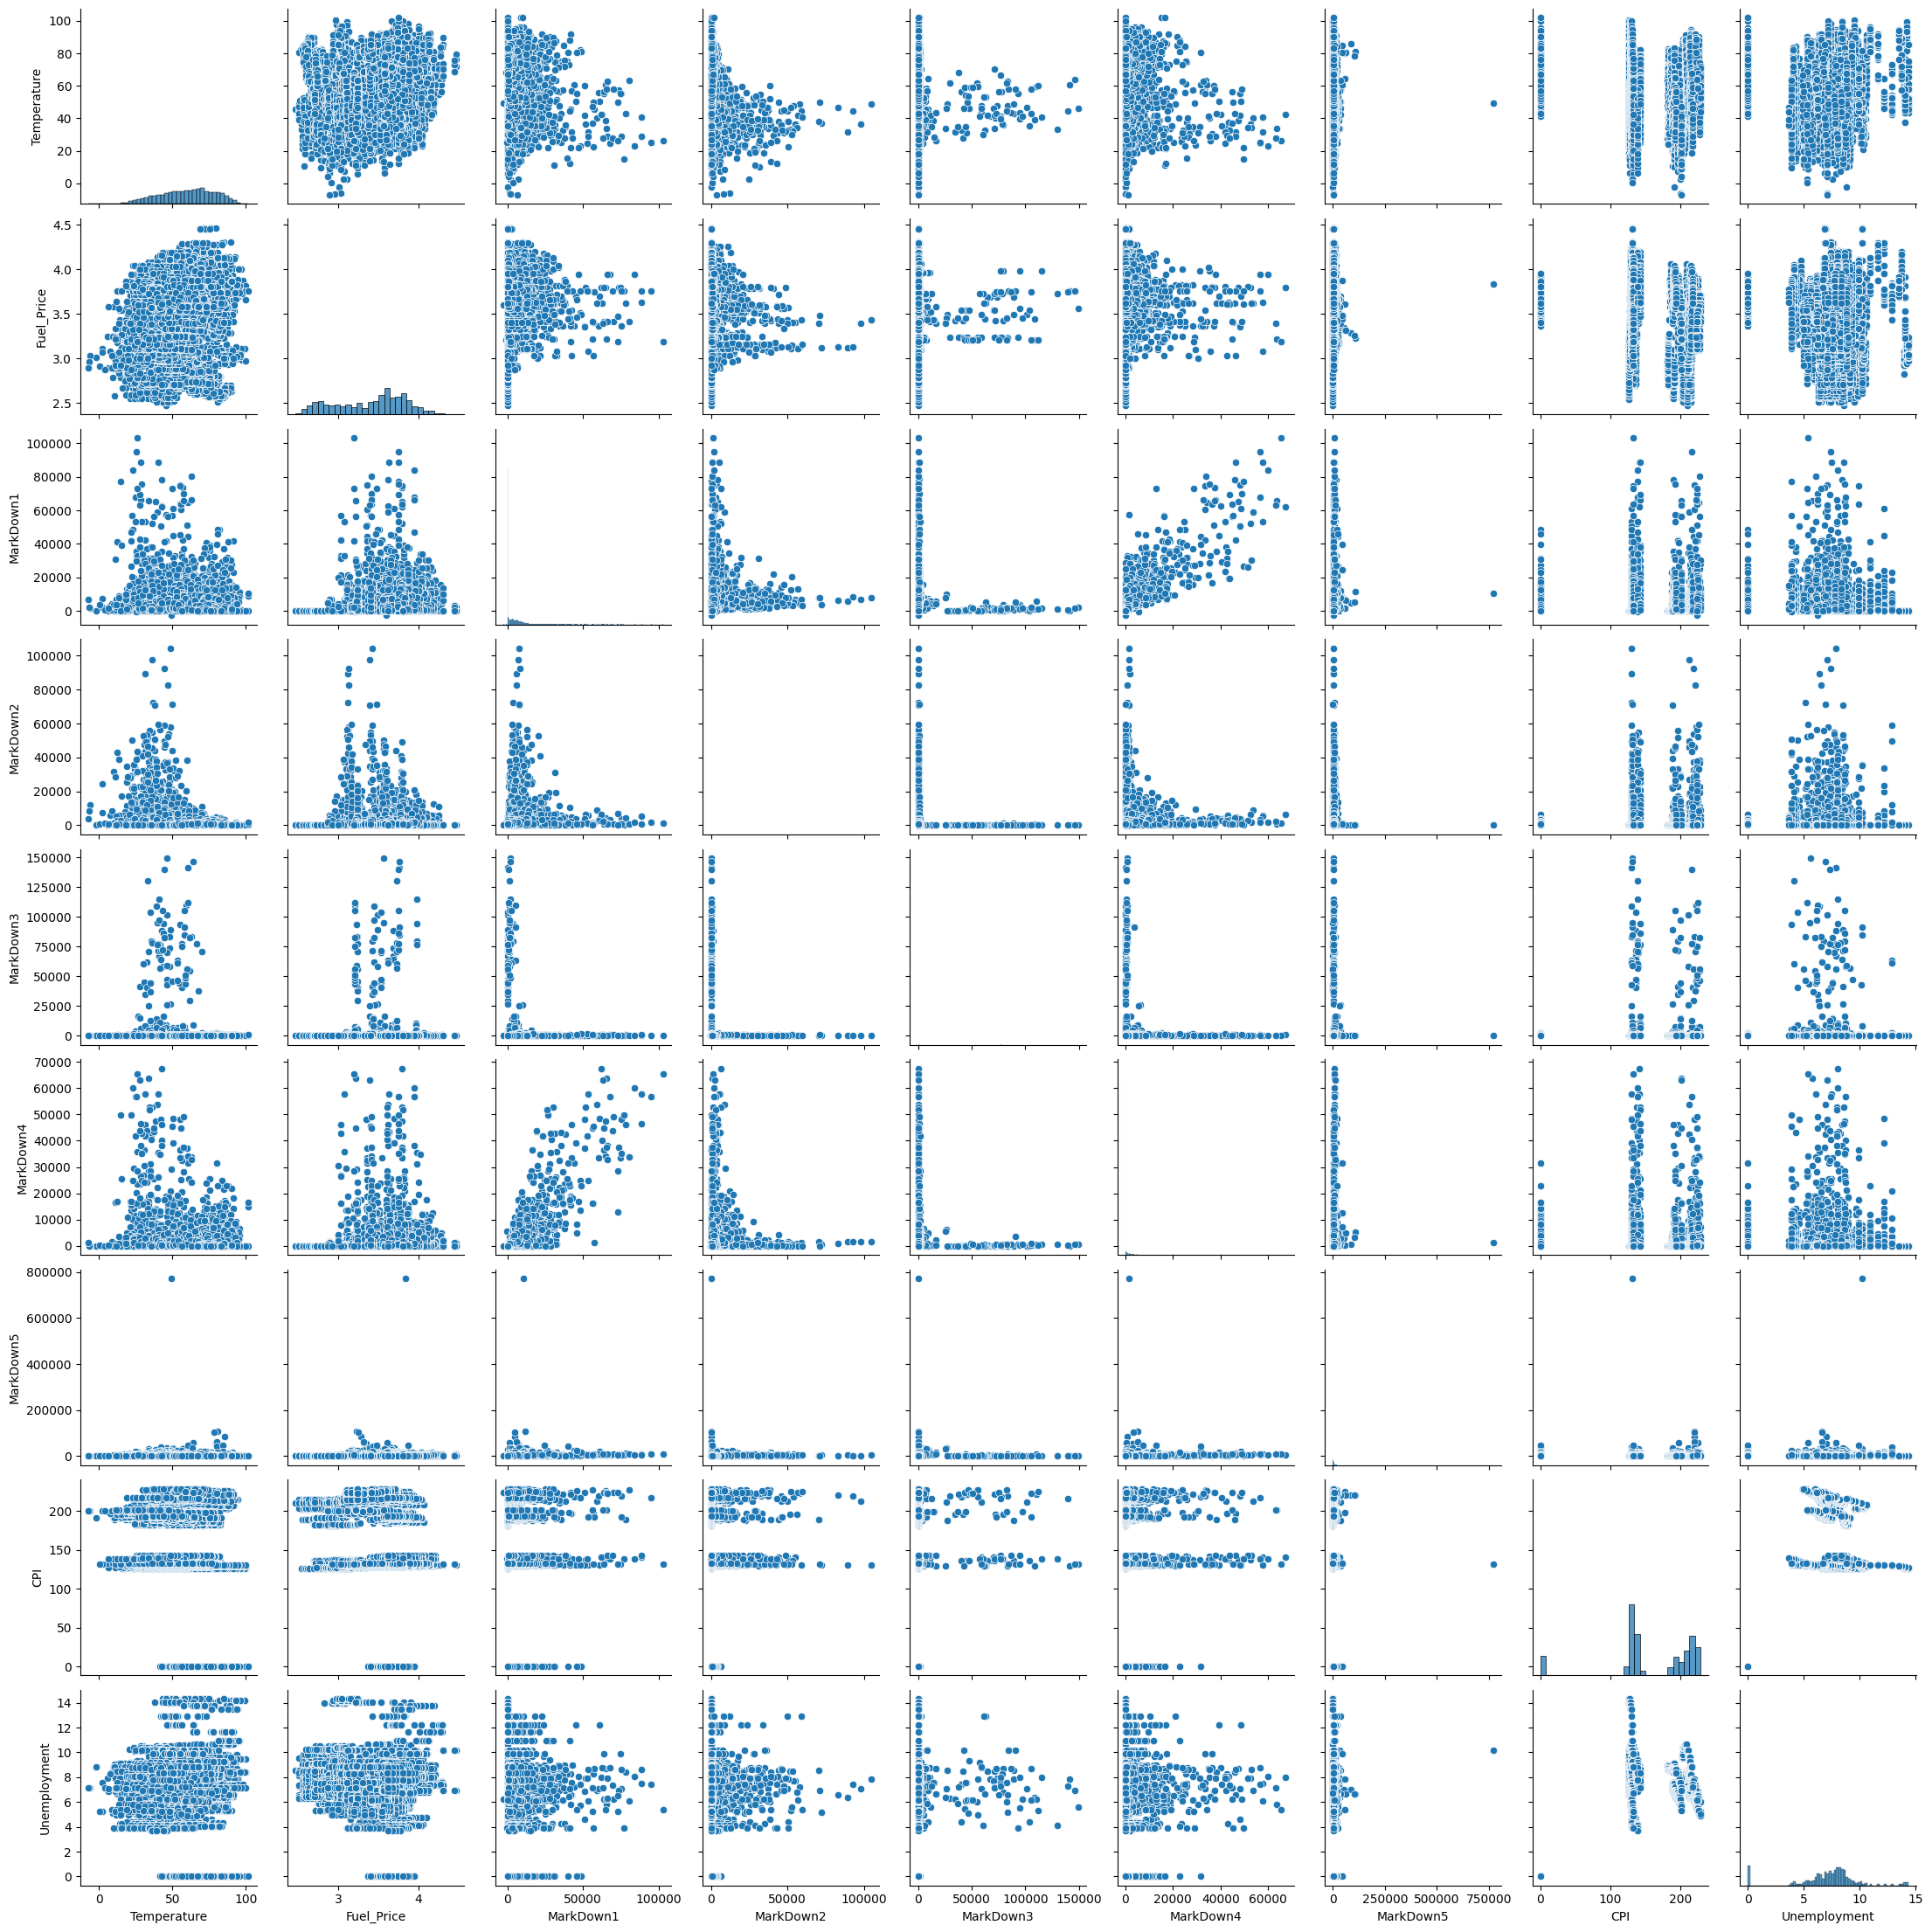

In [ ]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(features[num_cols])
plt.show()

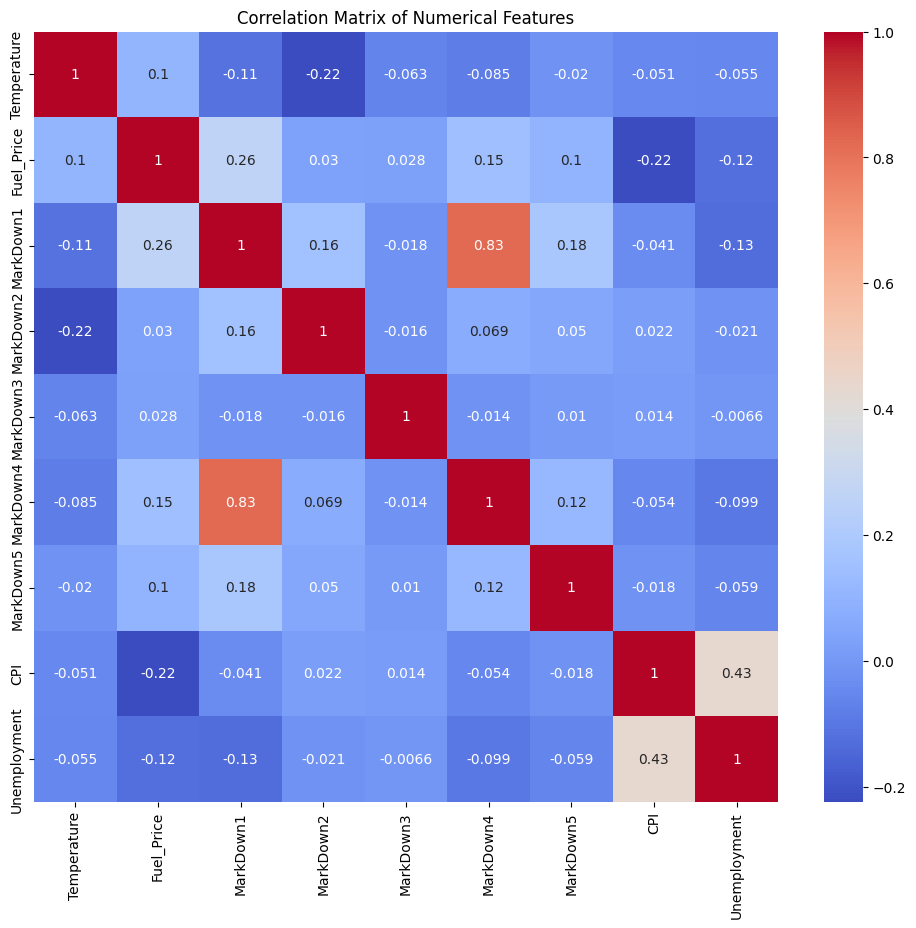

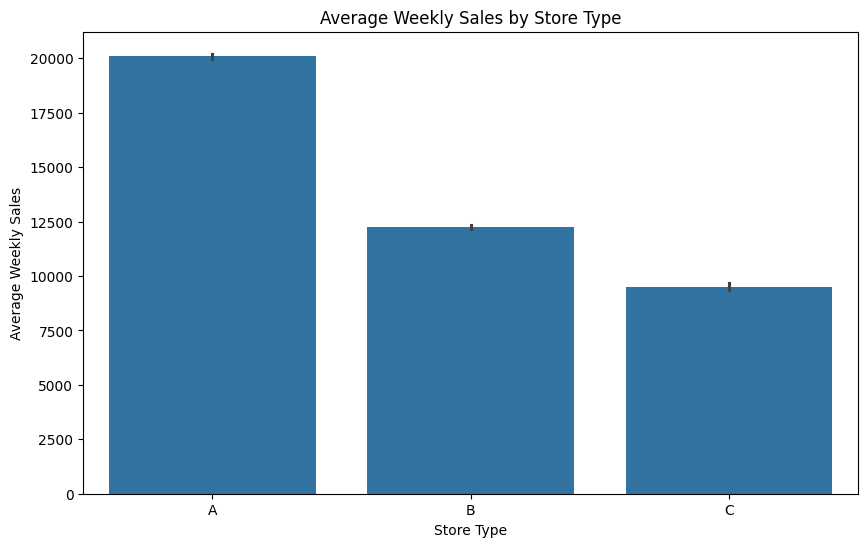

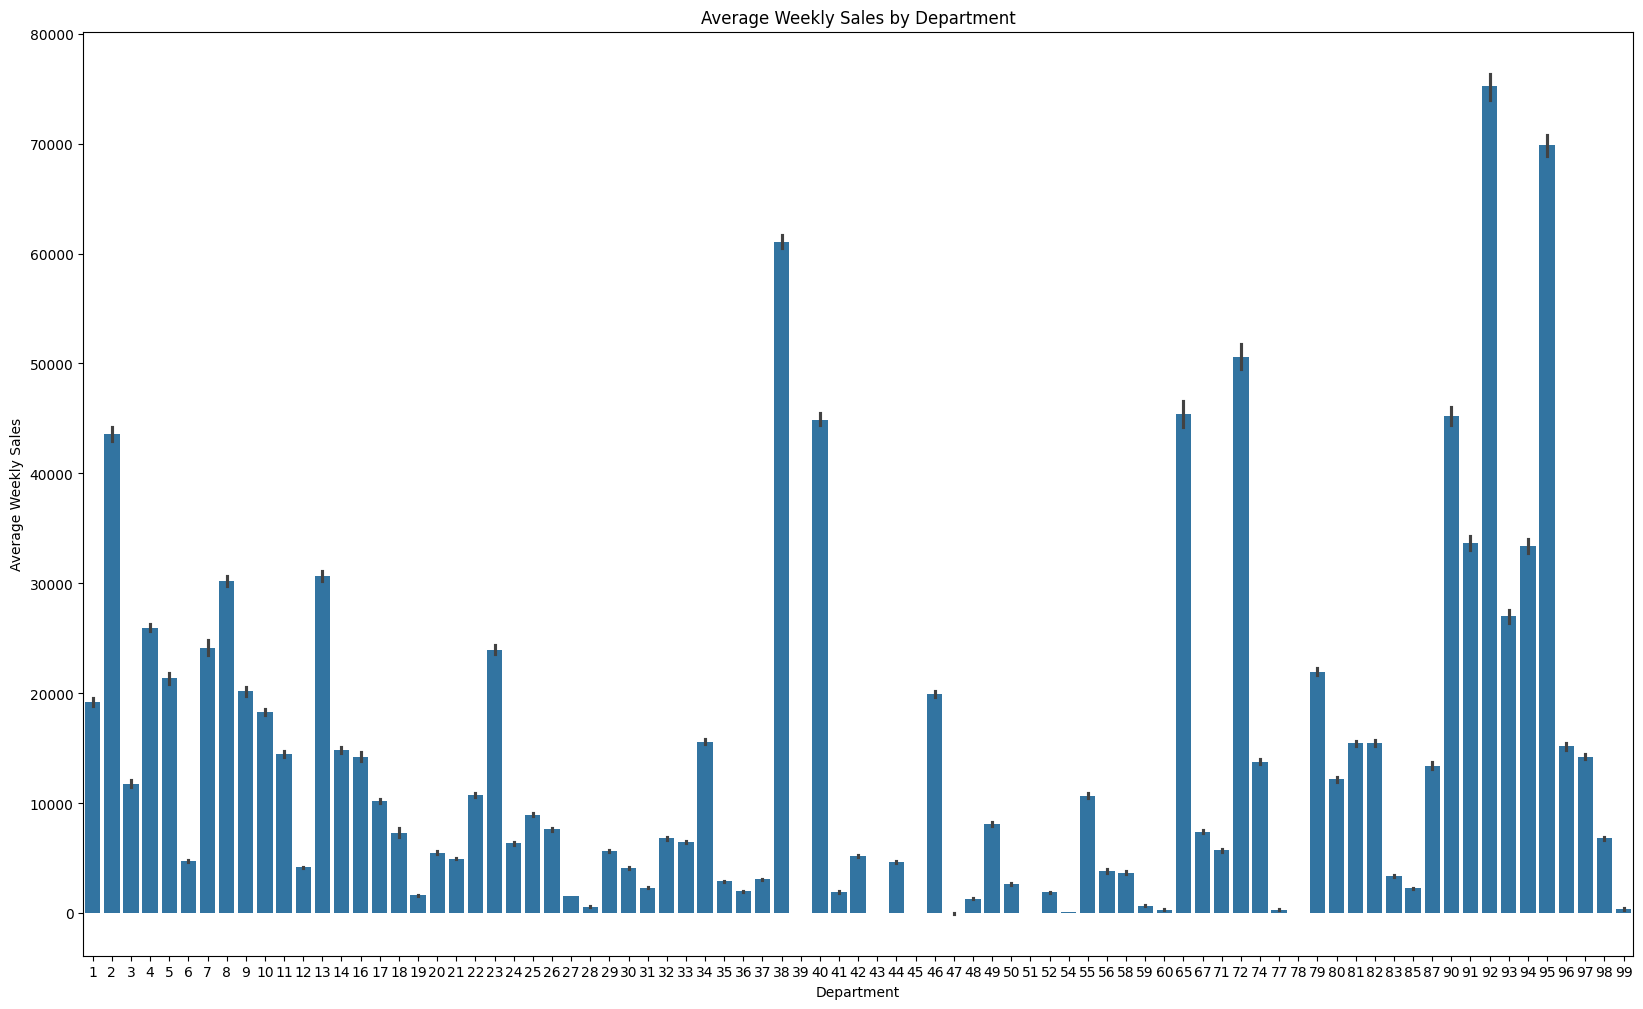

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='Type', y='Weekly_Sales')
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

plt.figure(figsize=(20, 12))
sns.barplot(data=train, x='Dept', y='Weekly_Sales')
plt.title('Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.show()

**Modeling - SALES FORECASTING ( TIME SERIES ANALYSIS )**

Time series analysis model is fitted to historical data to forecast future sales.

In [ ]:
store= 1
department= 1

sales_data = train[(train['Store']==store) & (train['Dept']==department)]['Weekly_Sales']

#fitting the model
model = ARIMA(sales_data, order= (1, 1, 1))
model_fit= model.fit()

Forecasting future sales:

In [ ]:
forecast_steps = 12
forecast = model_fit.forecast(steps = forecast_steps)

print(f"Forecasted sales for store {store} and department {department}: ")
display(forecast)

Forecasted sales for store 1 and department 1: 


,predicted_mean
143,25185.325057
144,23917.437317
145,23188.554842
146,22769.535363
147,22528.649718
148,22390.169537
149,22310.560141
150,22264.794343
151,22238.484531
152,22223.359564


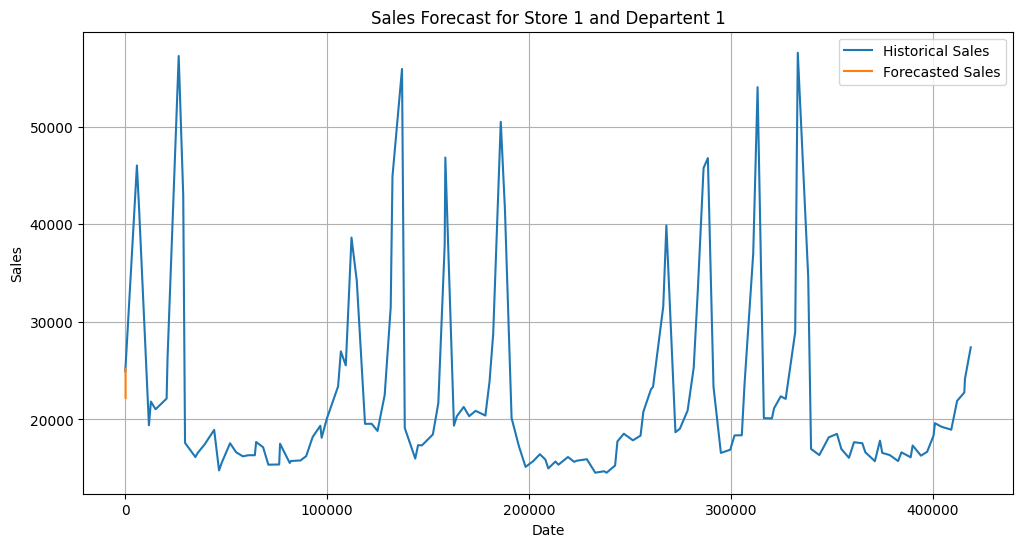

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(sales_data.index, sales_data.values, label ='Historical Sales')
plt.plot(forecast.index, forecast, label = 'Forecasted Sales')
plt.title(f"Sales Forecast for Store {store} and Departent {department}")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


Forecasted sales for store 1 and department 1 using SARIMAX: 


,predicted_mean
2012-11-02,19538.957264
2012-11-09,19904.027154
2012-11-16,21222.697784
2012-11-23,22393.020865
2012-11-30,20185.478718
2012-12-07,19814.687046
2012-12-14,23857.025535
2012-12-21,21546.609833
2012-12-28,18439.714745
2013-01-04,17971.090434


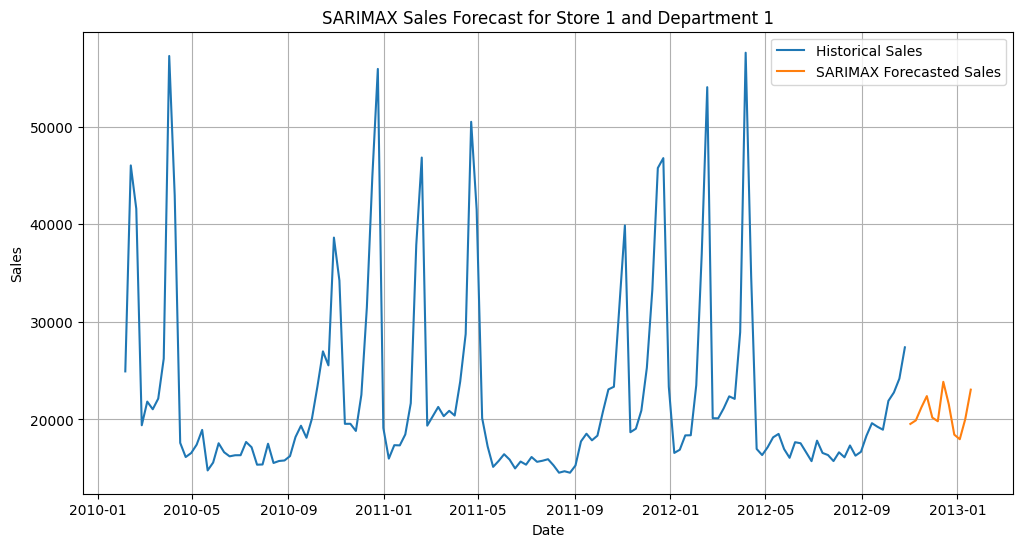

In [ ]:
# Fitting the SARIMAX model
model_sarimax = SARIMAX(sales_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarimax_fit = model_sarimax.fit(disp=False)

# Forecasting future sales using SARIMAX
forecast_sarimax = model_sarimax_fit.forecast(steps=forecast_steps)

print(f"\nForecasted sales for store {store} and department {department} using SARIMAX: ")
display(forecast_sarimax)

# Plotting the SARIMAX forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data.values, label='Historical Sales')
plt.plot(forecast_sarimax.index, forecast_sarimax, label='SARIMAX Forecasted Sales')
plt.title(f"SARIMAX Sales Forecast for Store {store} and Department {department}")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train and sales_data DataFrames are already loaded and processed as in the previous cells.
# If not, you would need to include the data loading and preprocessing steps here as well.

# --- Linear Regression and Ridge ---

# Prepare data for regression models
# Select features (excluding Date, Store, Dept, Store_Dept, and target variable)
features_cols = [col for col in train.columns if col not in ['Date', 'Store', 'Dept', 'Store_Dept', 'Weekly_Sales', 'Type', 'IsHoliday_x', 'Month_x', 'Year_x', 'Month_y', 'Year_y']]
X = train[features_cols]
y = train['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
rse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Initialize and train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)
rse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))


# --- ARIMA ---

# Assuming sales_data for a specific store/department is already created and indexed by Date
# Example (replace with your actual sales_data if needed):
# store = 1
# department = 1
# sales_data = train[(train['Store']==store) & (train['Dept']==department)].set_index('Date')['Weekly_Sales']


# Fitting the ARIMA model
model = ARIMA(sales_data, order= (1, 1, 1))
model_fit= model.fit()

# Calculate RSE and R2 for ARIMA (using in-sample predictions for comparison with regression models)
arima_predictions = model_fit.predict(start=0, end=len(sales_data)-1)

r2_arima = r2_score(sales_data, arima_predictions)
rse_arima = np.sqrt(mean_squared_error(sales_data, arima_predictions))


# --- Comparison ---

print("Model Performance Comparison:")
print("-" * 40)
print(f"Linear Regression R-squared: {r2_lr:.4f}")
print(f"Linear Regression RSE: {rse_lr:.4f}")
print("-" * 40)
print(f"Ridge Regression R-squared: {r2_ridge:.4f}")
print(f"Ridge Regression RSE: {rse_ridge:.4f}")
print("-" * 40)
print(f"ARIMA Model R-squared (on training data): {r2_arima:.4f}")
print(f"ARIMA Model RSE (on training data): {rse_arima:.4f}")
print("-" * 40)

Model Performance Comparison:
----------------------------------------
Linear Regression R-squared: 0.9654
Linear Regression RSE: 4243.9606
----------------------------------------
Ridge Regression R-squared: 0.9654
Ridge Regression RSE: 4243.9606
----------------------------------------
ARIMA Model R-squared (on training data): 0.2379
ARIMA Model RSE (on training data): 8572.6740
----------------------------------------


# Final Findings

## Walmart Sales Forecast

## Problem
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

## Aim
My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

## Solution
With the accurate prediction company can:

- Determine seasonal demands and take action for this
- Protect from money loss because achieving sales targets can have a positive effect on stock prices and investors' perceptions
- Forecast revenue easily and accurately
- Manage inventories
- Do more effective campaigns

The solution involved the following steps:
1. Understanding, Cleaning and Exploring Data (Data Preprocessing and EDA)
2. Preparing Data to Modeling (Feature Engineering)
3. Modeling using Time Series Analysis (ARIMA, SARIMAX) and Regression Models (Linear Regression, Ridge Regression)

## Data Overview and Preprocessing Summary
The following datasets were loaded:

- **train.csv**: Contains historical sales data, including Store, Dept, Date, Weekly_Sales, and IsHoliday.  
- **test.csv**: Contains similar data to train.csv but without Weekly_Sales, used for making future predictions.  
- **stores.csv**: Provides information about each store, including Store, Type, and Size.  
- **features.csv**: Contains additional features related to stores and dates, such as Temperature, Fuel_Price, MarkDowns, CPI, Unemployment, and IsHoliday.

### Initial Data Inspection
- `train.csv`, `test.csv`, and `stores.csv` have no missing values.  
- `features.csv` has significant missing values in the MarkDown columns (MarkDown1–5), and some missing values in CPI and Unemployment.

### Feature Engineering Steps
- Created a combined **Store_Dept** identifier.  
- Extracted **Month** and **Year** from the Date column.  
- Calculated **Total_MarkDown** by summing MarkDown columns.  
- Performed **one-hot encoding** on the Store Type column.  
- Merged stores and features with train/test datasets.  
- Created **lag features** (Weekly_Sales_Lag1, Weekly_Sales_Lag2).  
- Calculated **rolling mean/std** of Weekly_Sales.  
- Extracted **Quarter** and **WeekOfYear**.  
- Filled missing values with 0.  

## Exploratory Data Analysis (EDA) Insights
Key findings include:

1. **Distribution of Store Types**: Type A most numerous, followed by B and C.  
2. **Distribution of Store Sizes**: Clustered with peaks around certain ranges.  
3. **Weekly Sales Distribution**: Highly skewed, with outliers and negative values (returns/adjustments).  
4. **Weekly Sales by Store**: Significant variation; some consistently higher or lower.  
5. **Weekly Sales by Department**: Certain departments (92, 95, 38, 41, 72, 67) outperform others.  
6. **Weekly Sales Over Time**: Seasonal peaks (holidays), overall upward trend.  
7. **Sales vs Temperature**: No strong correlation.  
8. **Feature Correlations**: MarkDown1–4, MarkDown2–3, and CPI–Unemployment correlated.  
9. **Average Sales by Store Type/Department**: Type A highest; Departments 92 & 95 strongest.  

## Model Performance Comparison

### ARIMA Model
- R²: 0.2379  
- RSE: 8572.6740  

### Linear Regression Model
- R²: 0.9654  
- RSE: 4243.9606  

### Ridge Regression Model
- R²: 0.9654  
- RSE: 4243.9606  

### Comparison
- **Regression models (Linear & Ridge)** outperform ARIMA significantly.  
- Regression benefits from **feature engineering** across multiple datasets.  
- ARIMA effective for single time-series subsets, but less so for large multi-factor datasets.  

## Conclusion
- Regression models are more effective for Walmart sales forecasting on this dataset.  
- Feature-rich models capture seasonality, economic indicators, and markdown effects better.  
- Accurate forecasts can help Walmart **manage inventory, optimize campaigns, reduce losses, and improve investor confidence**.
